# *Challenge 2*: An empirical study on the learnability of functions by *NNs*

Advanced Topics in Machine Learning -- Fall 2024, UniTS

In the following *challenge exercises*, we will empirically investigate the behaviour of deep neural networks with respect to the learning of specific classes of functions, and in specific training regimes.

## A. The effect of *under-* and *over-* parameterisation in the *Teacher/Student* setup

In this exercise, we will train deep neural networks (*students*), supervisedly, on input/output pairs produced by another deep neural network with frozen weights (*teacher*). Given our ability to modulate the expressivity of both networks, this setup allows us to disentangle the effects of task hardness, model expressivity, and training dynamics.

We will monitor the training and test loss of the *students* during training, as well as the final distribution of weights. We will do so in three regimes: when the *student* has much less (*under-parameterisation*), much more (*over-parameterisation*) or exactly the same learnable parameters (within a fixed given structure) as those frozen in the *teacher*.

#### What to do?

1.   Instantiate the *teacher* model $\mathcal{T}$, a fully-connected feedforward neural network mapping a $100$-dimensional input to a single output scalar. Use  $3$ hidden layers of sizes, respectively: $75$, $50$, $10$. Use the $\mathsf{ReLU}$ activation function after all neurons, except for the output. Weights and biases should be initialised as *i.i.d.* samples from the Standard Normal distribution. Keep those parameters fixed for the rest of the exercise.
2.   Generate the **test set** for the learning task, by repeatedly querying the *teacher* model. Inputs $\boldsymbol{x}_i \in \mathbb{R}^{100}$ should be obtained as samples from the multivariate Uniform distribution in the interval $[0,2]^{100}$, whereas the outputs as $y_i = \mathcal{T}(\boldsymbol{x}_i)$. Generate at least $6 \times 10^4$ datapoints and keep them fixed for the rest of the exercise. Such points will be used as a way to quantify generalisation error by the *student* model.
3.   Instantiate the *student* model $\mathcal{S}$, a fully-connected feedforward neural network mapping a $100$-dimensional input to a single output scalar – as in the case of the teacher. Repeat the steps that follow with (at least) three different *student* models, architecturally identical to the *teacher* but with different number and width of the hidden layers.
     -   $S_u$: one hidden layer of size $10$;
     -   $S_e$: as for the *teacher*;
     -   $S_o$: $4$ hidden layers of sizes $200$, $200$, $200$, $100$;
4.   Train the *student* model on the *MSE* loss for a sufficiently large number of iterations, as to allow for the training and test loss to reach a quasi-stationary behaviour. To actually perform the training, harvest a fresh sample of $\mathsf{B}$ inputs (*i.e.* $\left\{{\boldsymbol{x}_1, \dots, \boldsymbol{x}_{\mathsf{B}}}\right\}$) per iteration, label each of them using the *teacher* model, and train the *student* on the given batch. Use an optimizer of your choice, taking care to tune (at least) its learning rate to minimize time to convergence. Do not use default learning rates assuming they are already optimal! Do not optimize batch-size (as it is scarcely effective when tuning also the learning rate): you can use $\mathsf{B}=128$ (or less, if you cannot make it fit into memory).
     As the training progresses, log the training loss (every batch, if you can). Additionally, log also the test-set loss every given number of batches (of your choice).
5.   Once the training is over, evaluate the *student* model on the test set one last time. Additionally, collect (separately) weights and biases for each layer of the *student* network, and compare their distribution to that of the *teacher* network. Do the same for the collection of all weights and biases of the network (*i.e.* not on a layer-wise basis).

Comment on the results collected, specifically in terms of: number of learnable parameters, trainability, generalisation, distributional convergence to target parameters. Do so individually in each case, as well as in comparison across the different *student* models.



## B. Function learning and hierarchical structure

In this exercise, we will train a particular kind of *deep residual network*, supervisedly, on examples generated by two specific polynomials. Although their monomials share most of their respective properties, one polynomial shows a strongly hierarchical structure, whereas the other does not. The hierarchical polynomial is $B_6$, *i.e.* the *sixth-order multivariate complete Bell polynomial*, which is defined as follows.
$$
B_6(x_1, x_2, x_3, x_4, x_5, x_6) = x_1^6 + 15x_2x_1^4 + 20x_3x_1^3 + 45x_2^2x_1^2 + 15x_2^3 + 60x_3x_2x_1 + 15x_4x_1^2 + 10x_3^2 + 15x_4x_2 + 6x_5x_1 + x_6 \text{.}
$$
We will analyse the generalisation error of the same model trained to reproduce each of the two polynomials, both in terms of general input/output mapping ability and sensitivity with respect to the variation of individual input components.

#### What to do?

1.   Define the non-hierarchical counterpart of $B_6$, which we will call $\tilde{B}_6: \mathbb{R}^6 \rightarrow \mathbb{R}$, with a *scrambled* monomial structure. In detail, start from the definition of $B_6$ and iteratively replace the $x_{i_k}$ from each $i^{\text{th}}$ monomial with a different $x_{i_{\sigma_{i}(k)}}$ so that:

     -   $\tilde{B}_6$ still depends non-trivially on all six input variables $x_1, x_2, x_3, x_4, x_5, x_6$.
     -   No two monomials of $\tilde{B}_6$ share the same permutation $\sigma_{i}$ of indices.
     -   No two monomials (regardless of their coefficient), although not sharing the same permutation $\sigma_{i}$ of indices, can be rearranged as such by means of the commutative property of sums and/or products. This should be a concern only for the two terms $15x_4x_2$ and $6x_5x_1$.

2.   Generate both a **training set** and a **test set** associated with $B_6$ and $\tilde{B}_6$. In particular:

     -   Harvest *i.i.d.* input vectors $\boldsymbol{x} = (x_1,\dots,x_{6}) \in \mathbb{R}^{6}$ from the multivariate Uniform distribution in the interval $[0,2]^{6}$;
     -   Compute the associated output scalar $y \in \mathbb{R}$ as $y = B_6(\boldsymbol{x})$ or $y = \tilde{B}_6(\boldsymbol{x})$. You do not need to share the same inputs $\boldsymbol{x}$ among the datasets generated by the two polynomials.

     Each training set should contain at least $10^{5}$ datapoints, whereas each test set at least $6\times 10^{4}$.

3.   Instantiate the model as a *fully-connected residual* deep neural network, *i.e.* a fully-connected feedforward neural network where each layer is endowed with a ResNet-style skip connection. Layers of different sizes share no skip connection, which is simply dropped.

     Use a network with $9$ layers ($1$ input layer, $8$ hidden layers, $1$ output layer), where hidden layers have all size $50$. Use the $\mathsf{ReLU}$ activation function after all neurons, except for the output.

4.   Train the model (in each of the two cases, *i.e.* $B_6$ and $\tilde{B}_6$) on the *MSE* loss for at least $30$ epochs, using a batch size $\mathsf{B}=20$. Use the $\mathsf{Adam}$ optimiser, with a learning rate tuned to minimise training error (independently across the two datasets). As the training progresses, log the training and test losses (at least once at the end of each epoch).

5.   Once the training is over, evaluate the model one last time on the test set. The result of such evaluation will be used as the *final* generalisation error.

6.   Investigate how the trained network models the dependency of the output on each input variable separately. To do so, proceed as follows.

     -   Harvest a new input vector $\boldsymbol{x} = (x_1,\dots,x_{6}) \in \mathbb{R}^{6}$ from the multivariate Uniform distribution in the interval $[0,2]^{6}$;
     -   For each of the input components, keep all the others fixed to their sampled value, whereas the one considered is evaluated on a fine uniform 1D grid $\mathcal{G} \subset [0,2]$.
     -   Evaluate both the target polynomial and the trained model on all resulting input points so generated, grouping their results according to the variable that is swept along the input interval. Compare the results of the sweeps (it is better to do so graphically!).

7.   **Optional:** Repeat step 6 some more times, and present results in an aggregate form. This is useful to average over the randomness introduced when evaluating the input/output dependency of single input components. Indeed, such evaluation strongly depends on the specific input values sampled in the first place before generating the sweeps.

Comment on the results. How does the hierarchical structure of the function to be learnt influence the learning process and/or the *final* learnt model?



E. Gardner and B. Derrida; Three unfinished works on the optimal storage capacity of networks. Journal of Physics A: Mathematical and General, 22(12):1983–1994, 1989.
V. Godbole, G.E. Dahl, J. Gilmer, C.J. Shallue and Z. Nado; Deep Learning Tuning Playbook, 2023.
T. Poggio and M. Fraser; Compositional sparsity of learnable functions. Bulletin of the American Mathematical Society, 61:438-456, 2024.

---
## Proposed Solution

In [82]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Adam

import numpy as np
import random

from tqdm import trange, tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

random.seed(3407)
np.random.seed(3407)
torch.manual_seed(3407)

---
## Exercise A.
### Point 1
Instantiate the *teacher* model $\mathcal{T}$, a fully-connected feedforward neural network mapping a $100$-dimensional input to a single output scalar. Use  $3$ hidden layers of sizes, respectively: $75$, $50$, $10$. Use the $\mathsf{ReLU}$ activation function after all neurons, except for the output. Weights and biases should be initialised as *i.i.d.* samples from the Standard Normal distribution. Keep those parameters fixed for the rest of the exercise.

In [83]:
class Teacher(nn.Module):
    
	def __init__(self,
			  	input_size : int = 100):
		super(Teacher, self).__init__()
		self.model = nn.Sequential(
			nn.Linear(input_size, 75),
			nn.ReLU(),
			nn.Linear(75, 50),
			nn.ReLU(),
			nn.Linear(50, 10),
			nn.ReLU(),
			nn.Linear(10, 1)
		)

		# Initialize weights from Standard Normal
		for m in self.model:
			if isinstance(m, nn.Linear):
				nn.init.normal_(m.weight, mean=0, std=1)
				nn.init.normal_(m.bias, mean=0, std=1)

	def forward(self, x):
		return self.model(x)

### Point 2
Generate the **test set** for the learning task, by repeatedly querying the *teacher* model. Inputs $\boldsymbol{x}_i \in \mathbb{R}^{100}$ should be obtained as samples from the multivariate Uniform distribution in the interval $[0,2]^{100}$, whereas the outputs as $y_i = \mathcal{T}(\boldsymbol{x}_i)$. Generate at least $6 \times 10^4$ datapoints and keep them fixed for the rest of the exercise. Such points will be used as a way to quantify generalisation error by the *student* model.

In [84]:
teacher = Teacher().eval()
X = 2 * torch.rand(int(6e4), 100)
y = teacher(X).detach().flatten()

# Put the data into a dataset
data = TensorDataset(X, y)

### Point 3
Instantiate the *student* model $\mathcal{S}$, a fully-connected feedforward neural network mapping a $100$-dimensional input to a single output scalar – as in the case of the teacher. Repeat the steps that follow with (at least) three different *student* models, architecturally identical to the *teacher* but with different number and width of the hidden layers.
-   $S_u$: one hidden layer of size $10$;
-   $S_e$: as for the *teacher*;
-   $S_o$: $4$ hidden layers of sizes $200$, $200$, $200$, $100$;

In [85]:
class Student_u(nn.Module):
	def __init__(self, input_size : int = 100):
		super(Student_u, self).__init__()
		self.model = nn.Sequential(
			nn.Linear(input_size, 10),
			nn.ReLU(),
			nn.Linear(10, 1)
		)

		# Initialize weights from Standard Normal
		for m in self.model:
			if isinstance(m, nn.Linear):
				nn.init.normal_(m.weight, mean=0, std=1)
				nn.init.normal_(m.bias, mean=0, std=1)

	def forward(self, x):
		return self.model(x)
	
class Student_e(nn.Module):
	def __init__(self, input_size : int = 100):
		super(Student_e, self).__init__()
		self.model = Teacher(input_size)

	def forward(self, x):
		return self.model(x)
	
class Student_o(nn.Module):
	def __init__(self, input_size : int = 100):
		super(Student_o, self).__init__()
		self.model = nn.Sequential(
			nn.Linear(input_size, 200),
			nn.ReLU(),
			nn.Linear(200, 200),
			nn.ReLU(),
			nn.Linear(200, 200),
			nn.ReLU(),
			nn.Linear(200, 100),
			nn.ReLU(),
			nn.Linear(100, 1)
		)

		# Initialize weights from Standard Normal
		for m in self.model:
			if isinstance(m, nn.Linear):
				nn.init.normal_(m.weight, mean=0, std=1)
				nn.init.normal_(m.bias, mean=0, std=1)

	def forward(self, x):
		return self.model(x)
	
student_e = Student_e()
student_u = Student_u()
student_o = Student_o()

### Point 4
Train the *student* model on the *MSE* loss for a sufficiently large number of iterations, as to allow for the training and test loss to reach a quasi-stationary behaviour. To actually perform the training, harvest a fresh sample of $\mathsf{B}$ inputs (*i.e.* $\left\{{\boldsymbol{x}_1, \dots, \boldsymbol{x}_{\mathsf{B}}}\right\}$) per iteration, label each of them using the *teacher* model, and train the *student* on the given batch. Use an optimizer of your choice, taking care to tune (at least) its learning rate to minimize time to convergence. Do not use default learning rates assuming they are already optimal! Do not optimize batch-size (as it is scarcely effective when tuning also the learning rate): you can use $\mathsf{B}=128$ (or less, if you cannot make it fit into memory).
As the training progresses, log the training loss (every batch, if you can). Additionally, log also the test-set loss every given number of batches (of your choice).

In [86]:
BATCH_SIZE = 128
EPOCHS = 1000
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

def train_student(student, optimizer, loss, batch_size=BATCH_SIZE, epochs=EPOCHS, device=DEVICE):
	tr_losses = []
	eval_losses = []
	student = student.to(device)
	for epoch in trange(epochs):
		student.train()
		# Generate the batch from the teacher of size batch_size
		X = 2 * torch.rand(batch_size, 100)
		y = teacher(X).detach().flatten().to(device)
		X = X.to(device)

		# Train the model on this batch
		optimizer.zero_grad()
		y_pred = student(X)
		tr_l = loss(y_pred.flatten(), y)
		tr_l.backward()
		optimizer.step()
		tr_losses.append(tr_l.item())

		if epoch % 20 == 0:
			student.eval()
			X, y = data[:]
			X, y = X.to(device), y.to(device)
			y_pred = student(X)
			eval_loss = loss(y_pred.flatten(), y).item()
			eval_losses.append(eval_loss)

	return tr_losses, eval_losses

In [87]:
learning_rates = [5e-4, 5e-3, 1e-2, 3.5e-2, 2e-1]
models = ['student_u', 'student_e', 'student_o']

In [88]:
results = {}

for student in models:
	print(f"Training {student}")
	results[student] = []
	for lr in learning_rates:
		if student == 'student_e':
			model = Student_e()
		elif student == 'student_u':
			model = Student_u()
		else:
			model = Student_o()
		optimizer = Adam(model.parameters(), lr=lr)
		loss = nn.MSELoss()
		tr_losses, eval_losses = train_student(model, optimizer, loss)
		results[student].extend([{"lr": lr, "tr_loss": tr_losses[-1], "eval_loss": eval_losses[-1]}])


Training student_u


100%|██████████| 1000/1000 [00:01<00:00, 789.45it/s]


Training student_e


100%|██████████| 1000/1000 [00:02<00:00, 442.55it/s]


Training student_o


100%|██████████| 1000/1000 [00:07<00:00, 141.33it/s]


In [99]:
# for each model, take the one with minimum eval_loss
best_models = {}
for student in models:
	best_models[student] = min(results[student], key=lambda x: x['eval_loss'])

print(tabulate(best_models.items(), headers=['Model', 'Best Hyperparameters']))

Model      Best Hyperparameters
---------  ------------------------------------------------------------------------
student_u  {'lr': 0.2, 'tr_loss': 13496.0693359375, 'eval_loss': 11577.28125}
student_e  {'lr': 0.035, 'tr_loss': 11804.853515625, 'eval_loss': 11295.2666015625}
student_o  {'lr': 0.035, 'tr_loss': 12928.3125, 'eval_loss': 17987.3515625}


In [90]:
# Train the best models on the full dataset
tr_losses = {}
eval_losses = {}

for student in models:
	if student == 'student_e':
		model = Student_e()
	elif student == 'student_u':
		model = Student_u()
	else:
		model = Student_o()
	optimizer = Adam(model.parameters(), lr=best_models[student]['lr'])
	loss = nn.MSELoss()
	tr_losses[student], eval_losses[student] = train_student(model, optimizer, loss)

	torch.save(model.state_dict(), f"{student}.pt")

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:07<00:00, 137.07it/s]


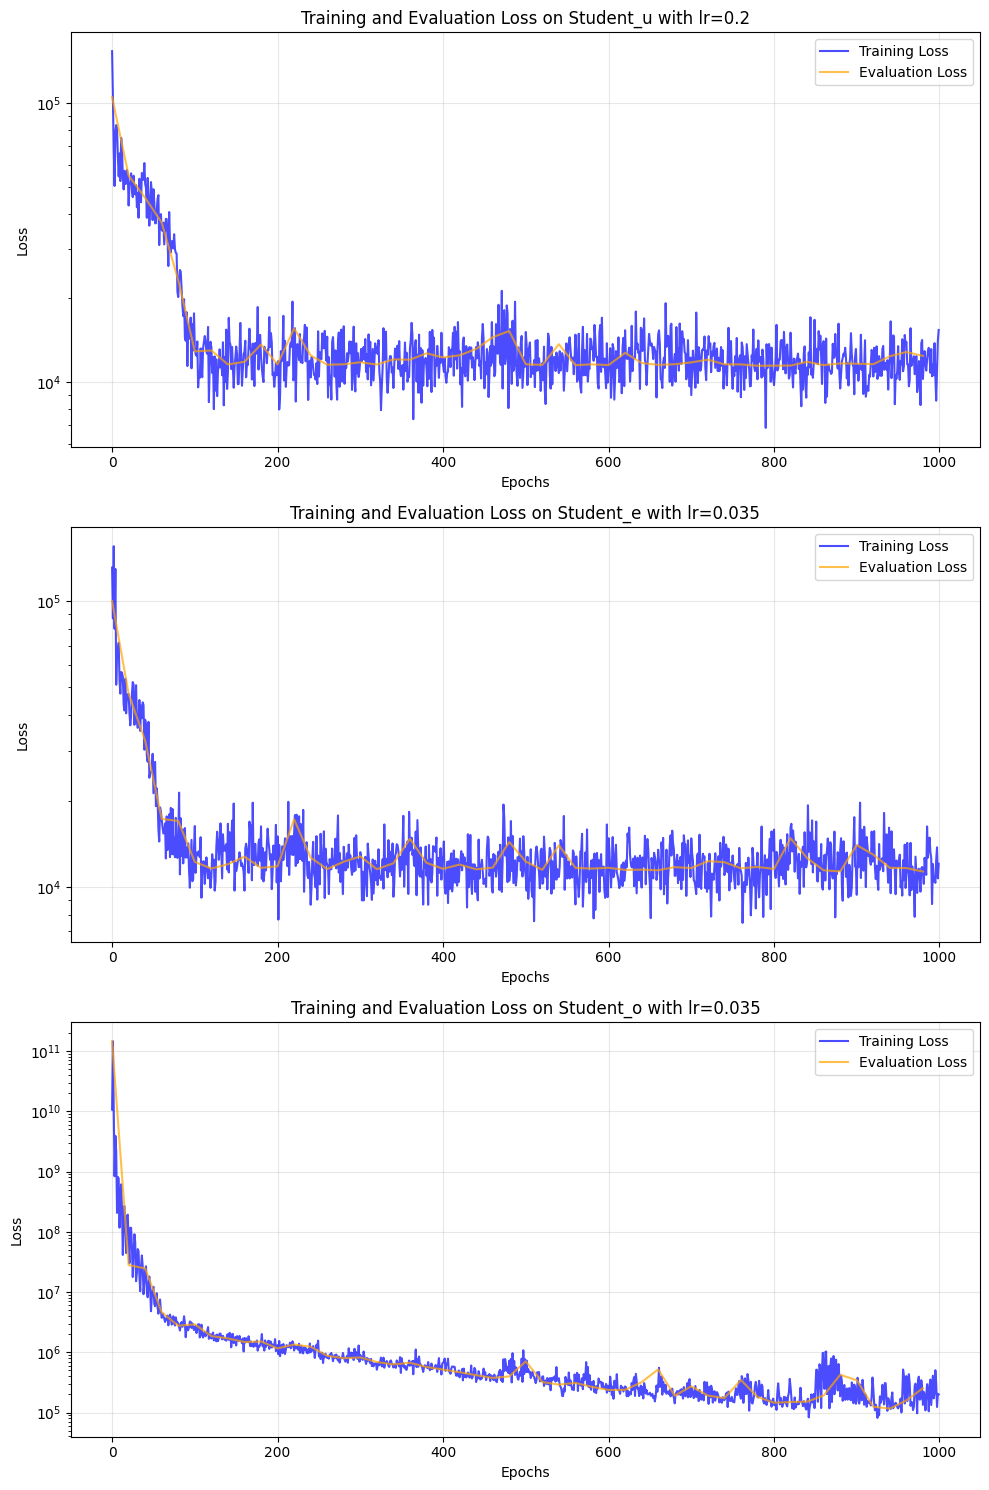

In [107]:
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(311)

ax.plot(tr_losses['student_u'], label='Training Loss', color='blue', alpha=0.7)
ax.plot(range(0, len(tr_losses['student_u']), 20), eval_losses['student_u'], label='Evaluation Loss', color='orange', alpha=0.7)

ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title(f'Training and Evaluation Loss on Student_u with lr={best_models["student_u"]["lr"]}')
ax.legend()
ax.grid(alpha=0.3)
ax.set_yscale('log')

ax = fig.add_subplot(312)

ax.plot(tr_losses['student_e'], label='Training Loss', color='blue', alpha=0.7)
ax.plot(range(0, len(tr_losses['student_e']), 20), eval_losses['student_e'], label='Evaluation Loss', color='orange', alpha=0.7)

ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title(f'Training and Evaluation Loss on Student_e with lr={best_models["student_e"]["lr"]}')
ax.legend()
ax.grid(alpha=0.3)
ax.set_yscale('log')

ax = fig.add_subplot(313)

ax.plot(tr_losses['student_o'], label='Training Loss', color='blue', alpha=0.7)
ax.plot(range(0, len(tr_losses['student_o']), 20), eval_losses['student_o'], label='Evaluation Loss', color='orange', alpha=0.7)

ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_title(f'Training and Evaluation Loss on Student_o with lr={best_models["student_o"]["lr"]}')
ax.legend()
ax.grid(alpha=0.3)
ax.set_yscale('log')

plt.tight_layout()
plt.savefig('../reports/challenge2/images/training_curves_exA.png')
plt.show()

### Point 5
Once the training is over, evaluate the *student* model on the test set one last time. Additionally, collect (separately) weights and biases for each layer of the *student* network, and compare their distribution to that of the *teacher* network. Do the same for the collection of all weights and biases of the network (*i.e.* not on a layer-wise basis).

In [100]:
final_eval_loss = {}

for student in models:
	model = Student_u() if student == 'student_u' else Student_e() if student == 'student_e' else Student_o()
	model.load_state_dict(torch.load(f"{student}.pt", weights_only=True))
	model.eval()
	X, y = data[:]
	y_pred = model(X)
	final_eval_loss[student] = nn.MSELoss()(y_pred.flatten(), y).item()

print(tabulate(final_eval_loss.items(), headers=['Model', 'Final Evaluation Loss'], tablefmt='fancy_grid', numalign='right'))

╒═══════════╤═════════════════════════╕
│ Model     │   Final Evaluation Loss │
╞═══════════╪═════════════════════════╡
│ student_u │                 11752.7 │
├───────────┼─────────────────────────┤
│ student_e │                 14566.2 │
├───────────┼─────────────────────────┤
│ student_o │                 10965.8 │
╘═══════════╧═════════════════════════╛


In [95]:
student_u = Student_u()
student_e = Student_e()
student_o = Student_o()

student_u.load_state_dict(torch.load('student_u.pt', weights_only=True))
student_e.load_state_dict(torch.load('student_e.pt', weights_only=True))
student_o.load_state_dict(torch.load('student_o.pt', weights_only=True))

# Collect the weights and biases of the models, f.e layer, taking mean and std
student_u_weights = []
student_u_biases = []
student_e_weights = []
student_e_biases = []
student_o_weights = []
student_o_biases = []

teacher_weights = []
teacher_biases = []

for m in student_u.model:
	if isinstance(m, nn.Linear):
		student_u_weights.append(m.weight.data.numpy())
		student_u_biases.append(m.bias.data.numpy())

for m in student_e.model.model:
	if isinstance(m, nn.Linear):
		student_e_weights.append(m.weight.data.numpy())
		student_e_biases.append(m.bias.data.numpy())

for m in student_o.model:
	if isinstance(m, nn.Linear):
		student_o_weights.append(m.weight.data.numpy())
		student_o_biases.append(m.bias.data.numpy())

for m in teacher.model:
	if isinstance(m, nn.Linear):
		teacher_weights.append(m.weight.data.numpy())
		teacher_biases.append(m.bias.data.numpy())

In [96]:
print("Student_u weights:", len(student_u_weights))
# print("Student_u biases:", student_u_biases)
print("Student_e weights:", len(student_e_weights))
# print("Student_e biases:", student_e_biases)
print("Student_o weights:", len(student_o_weights))
print("Student_o biases:", len(student_o_biases))
print("Teacher weights:", len(teacher_weights))
print("Teacher biases:", len(teacher_biases))


Student_u weights: 2
Student_e weights: 4
Student_o weights: 5
Student_o biases: 5
Teacher weights: 4
Teacher biases: 4


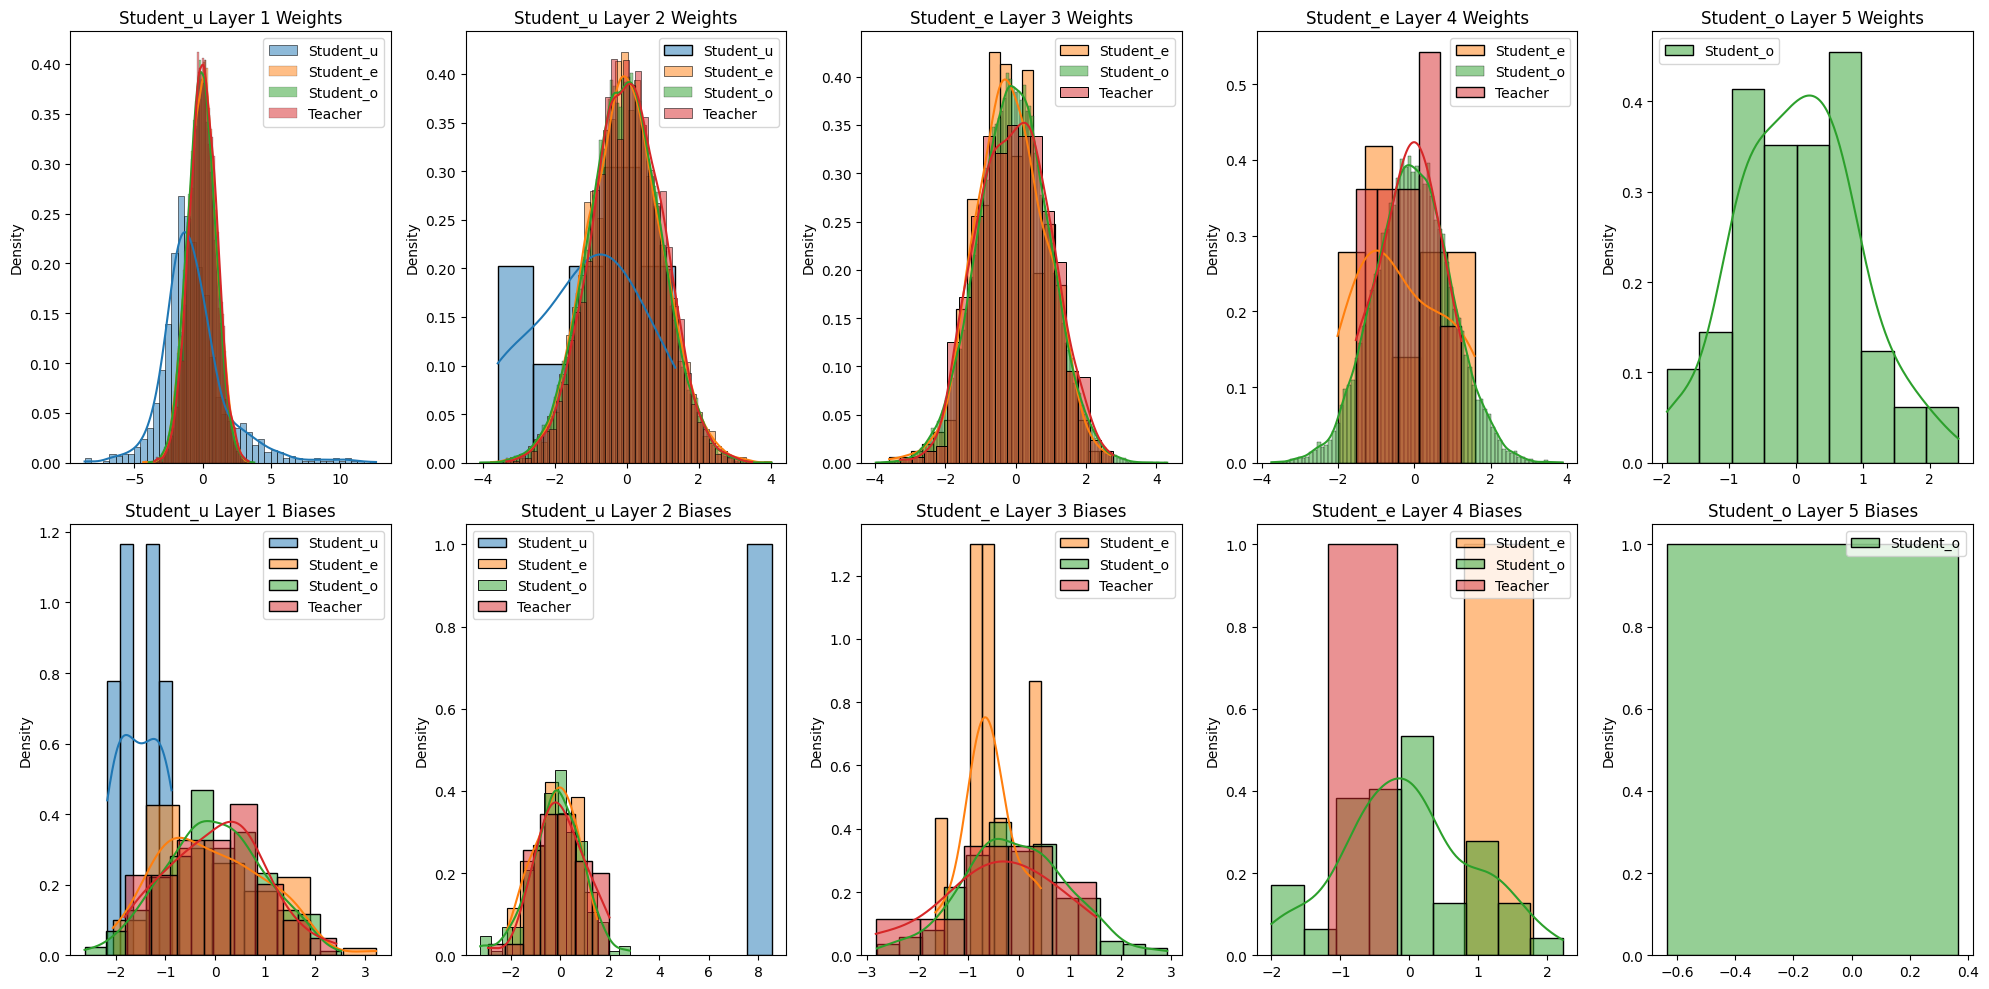

In [98]:
# For each layer, plot the histogram of the weights and biases, with KDE

palette = {
    "Student_u": "#1f77b4",  # Blue
    "Student_e": "#ff7f0e",  # Orange
    "Student_o": "#2ca02c",  # Green
    "Teacher": "#d62728",   # Red
}

fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(251)
sns.histplot(student_u_weights[0].flatten(), kde=True, ax=ax, stat='density', color=palette['Student_u'], label='Student_u')
sns.histplot(student_e_weights[0].flatten(), kde=True, ax=ax, stat='density', color=palette['Student_e'], label='Student_e')
sns.histplot(student_o_weights[0].flatten(), kde=True, ax=ax, stat='density', color=palette['Student_o'], label='Student_o')
sns.histplot(teacher_weights[0].flatten(), kde=True, ax=ax, stat='density', color=palette['Teacher'], label='Teacher')
ax.set_title('Student_u Layer 1 Weights')
ax.legend()

ax = fig.add_subplot(256)
sns.histplot(student_u_biases[0].flatten(), kde=True, ax=ax, stat='density', color=palette['Student_u'], label='Student_u')
sns.histplot(student_e_biases[0].flatten(), kde=True, ax=ax, stat='density', color=palette['Student_e'], label='Student_e')
sns.histplot(student_o_biases[0].flatten(), kde=True, ax=ax, stat='density', color=palette['Student_o'], label='Student_o')
sns.histplot(teacher_biases[0].flatten(), kde=True, ax=ax, stat='density', color=palette['Teacher'], label='Teacher')
ax.set_title('Student_u Layer 1 Biases')
ax.legend()

ax = fig.add_subplot(252)
sns.histplot(student_u_weights[1].flatten(), kde=True, ax=ax, stat='density', color=palette['Student_u'], label='Student_u')
sns.histplot(student_e_weights[1].flatten(), kde=True, ax=ax, stat='density', color=palette['Student_e'], label='Student_e')
sns.histplot(student_o_weights[1].flatten(), kde=True, ax=ax, stat='density', color=palette['Student_o'], label='Student_o')
sns.histplot(teacher_weights[1].flatten(), kde=True, ax=ax, stat='density', color=palette['Teacher'], label='Teacher')
ax.set_title('Student_u Layer 2 Weights')
ax.legend()

ax = fig.add_subplot(257)
sns.histplot(student_u_biases[1].flatten(), kde=True, ax=ax, stat='density', color=palette['Student_u'], label='Student_u')
sns.histplot(student_e_biases[1].flatten(), kde=True, ax=ax, stat='density', color=palette['Student_e'], label='Student_e')
sns.histplot(student_o_biases[1].flatten(), kde=True, ax=ax, stat='density', color=palette['Student_o'], label='Student_o')
sns.histplot(teacher_biases[1].flatten(), kde=True, ax=ax, stat='density', color=palette['Teacher'], label='Teacher')
ax.set_title('Student_u Layer 2 Biases')
ax.legend()

ax = fig.add_subplot(253)
sns.histplot(student_e_weights[2].flatten(), kde=True, ax=ax, stat='density', color=palette['Student_e'], label='Student_e')
sns.histplot(student_o_weights[2].flatten(), kde=True, ax=ax, stat='density', color=palette['Student_o'], label='Student_o')
sns.histplot(teacher_weights[2].flatten(), kde=True, ax=ax, stat='density', color=palette['Teacher'], label='Teacher')
ax.set_title('Student_e Layer 3 Weights')
ax.legend()

ax = fig.add_subplot(258)
sns.histplot(student_e_biases[2].flatten(), kde=True, ax=ax, stat='density', color=palette['Student_e'], label='Student_e')
sns.histplot(student_o_biases[2].flatten(), kde=True, ax=ax, stat='density', color=palette['Student_o'], label='Student_o')
sns.histplot(teacher_biases[2].flatten(), kde=True, ax=ax, stat='density', color=palette['Teacher'], label='Teacher')
ax.set_title('Student_e Layer 3 Biases')
ax.legend()

ax = fig.add_subplot(254)
sns.histplot(student_e_weights[3].flatten(), kde=True, ax=ax, stat='density', color=palette['Student_e'], label='Student_e')
sns.histplot(student_o_weights[3].flatten(), kde=True, ax=ax, stat='density', color=palette['Student_o'], label='Student_o')
sns.histplot(teacher_weights[3].flatten(), kde=True, ax=ax, stat='density', color=palette['Teacher'], label='Teacher')
ax.set_title('Student_e Layer 4 Weights')
ax.legend()

ax = fig.add_subplot(259)
sns.histplot(student_e_biases[3].flatten(), kde=True, ax=ax, stat='density', color=palette['Student_e'], label='Student_e')
sns.histplot(student_o_biases[3].flatten(), kde=True, ax=ax, stat='density', color=palette['Student_o'], label='Student_o')
sns.histplot(teacher_biases[3].flatten(), kde=True, ax=ax, stat='density', color=palette['Teacher'], label='Teacher')
ax.set_title('Student_e Layer 4 Biases')
ax.legend()

ax = fig.add_subplot(255)
sns.histplot(student_o_weights[4].flatten(), kde=True, ax=ax, stat='density', color=palette['Student_o'], label='Student_o')
ax.set_title('Student_o Layer 5 Weights')
ax.legend()

ax = fig.add_subplot(2, 5, 10)
sns.histplot(student_o_biases[4].flatten(), kde=True, ax=ax, stat='density', color=palette['Student_o'], label='Student_o')
ax.set_title('Student_o Layer 5 Biases')
ax.legend()

plt.tight_layout()
plt.savefig('../reports/challenge2/images/weights_biases_histograms_layers_exA.png')
plt.show()


Now compare global weights and biases

In [101]:
student_u_weights = []
student_u_biases = []
student_e_weights = []
student_e_biases = []
student_o_weights = []
student_o_biases = []

teacher_weights = []
teacher_biases = []

for m in student_u.model:
	if isinstance(m, nn.Linear):
		student_u_weights.extend(m.weight.data.numpy().flatten())
		student_u_biases.extend(m.bias.data.numpy())

for m in student_e.model.model:
	if isinstance(m, nn.Linear):
		student_e_weights.extend(m.weight.data.numpy().flatten())
		student_e_biases.extend(m.bias.data.numpy())

for m in student_o.model:
	if isinstance(m, nn.Linear):
		student_o_weights.extend(m.weight.data.numpy().flatten())
		student_o_biases.extend(m.bias.data.numpy())

for m in teacher.model:
	if isinstance(m, nn.Linear):
		teacher_weights.extend(m.weight.data.numpy().flatten())
		teacher_biases.extend(m.bias.data.numpy())

# make them a unique numpy array

In [102]:
print("Student_u weights:", len(student_u_weights))
# print("Student_u biases:", student_u_biases)
print("Student_e weights:", len(student_e_weights))
# print("Student_e biases:", student_e_biases)
print("Student_o weights:", len(student_o_weights))
# print("Student_o biases:", student_o_biases)
print("Teacher weights:", len(teacher_weights))
# print("Teacher biases:", teacher_biases)

Student_u weights: 1010
Student_e weights: 11760
Student_o weights: 120100
Teacher weights: 11760


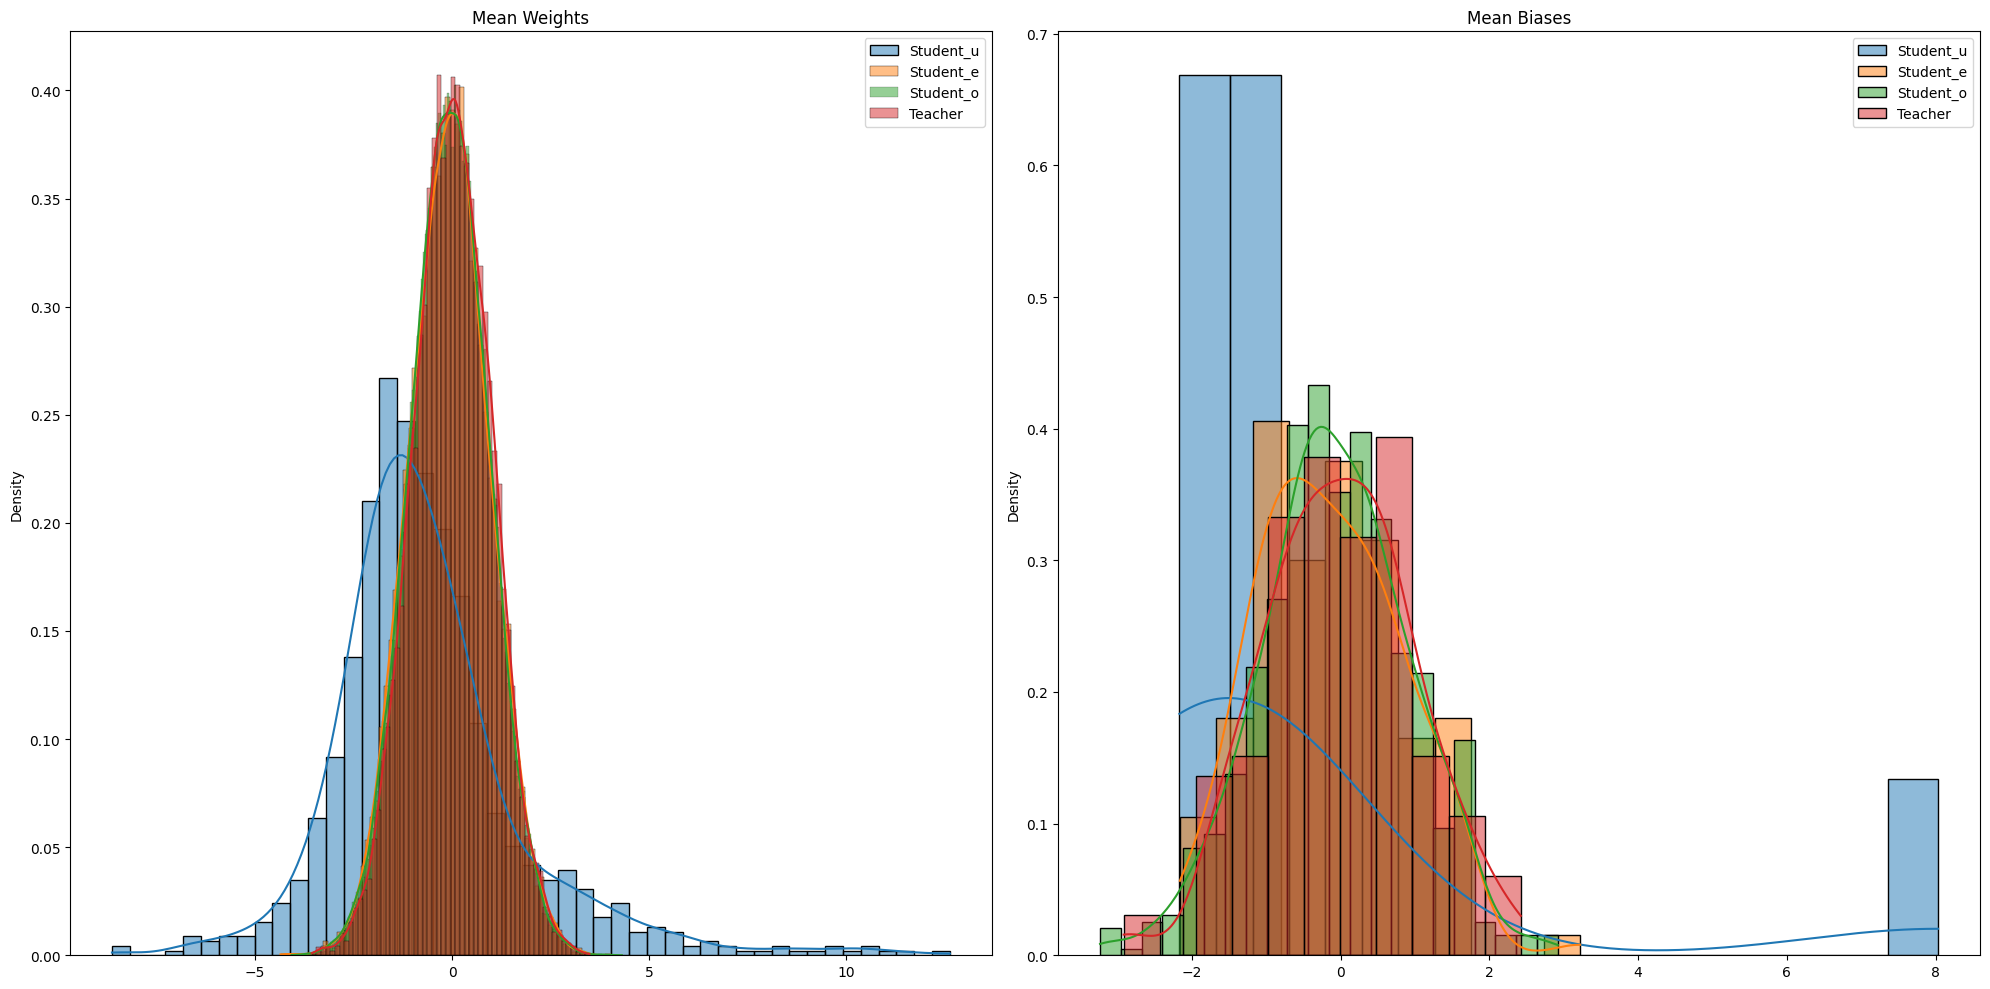

In [104]:
# Make a histogram of the means of the weights and biases
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(121)
sns.histplot(student_u_weights, kde=True, ax=ax, stat='density', color=palette['Student_u'], label='Student_u')
sns.histplot(student_e_weights, kde=True, ax=ax, stat='density', color=palette['Student_e'], label='Student_e')
sns.histplot(student_o_weights, kde=True, ax=ax, stat='density', color=palette['Student_o'], label='Student_o')
sns.histplot(teacher_weights, kde=True, ax=ax, stat='density', color=palette['Teacher'], label='Teacher')
ax.set_title('Mean Weights')
ax.legend()

ax = fig.add_subplot(122)
sns.histplot(student_u_biases, kde=True, ax=ax, stat='density', color=palette['Student_u'], label='Student_u')
sns.histplot(student_e_biases, kde=True, ax=ax, stat='density', color=palette['Student_e'], label='Student_e')
sns.histplot(student_o_biases, kde=True, ax=ax, stat='density', color=palette['Student_o'], label='Student_o')
sns.histplot(teacher_biases, kde=True, ax=ax, stat='density', color=palette['Teacher'], label='Teacher')
ax.set_title('Mean Biases')
ax.legend()

plt.tight_layout()
plt.savefig('../reports/challenge2/images/weights_biases_histograms_global_exA.png')
plt.show()

We can observe that the two models that perform better in terms of validation error are the ones with a similar distribution of the wieghts within the network, so the equally-parametrized and overparametrized network.

---
---

## Exercise B

### Step 1.
Define the Bell polynomial and its scrambled version

In [109]:
def bell_6(x):
    return x[0]**6 + \
    		15*x[1]*x[0]**4 + \
            20*x[2]*x[0]**3 + \
            45*(x[1]**2)*(x[0]**2) +\
            15*x[1]**3 + \
            60*x[2]*x[1]*x[0] +\
            15*x[3]*x[0]**2 + \
            10*x[2]**2 + \
            15*x[3]*x[1] + \
            6*x[4]*x[0] + \
            x[5]

def bell_6_scrambled(x):
    return x[2]**6 + \
    		15*x[2]*x[3]**4 + \
            20*x[3]*x[1]**3 + \
            45*(x[3]**2)*(x[2]**2) +\
            15*x[4]**3 + \
            60*x[3]*x[0]*x[4] +\
            15*x[5]*x[4]**2 + \
            10*x[1]**2 + \
            15*x[5]*x[3] + \
            6*x[1]*x[4] + \
            x[0]

### Step 2. 
Generate data

In [110]:
# Generate from multivariate uniform distribution
X_train = 2 * torch.rand(int(1e5), 6)
X_test = 2 * torch.rand(int(6e4), 6)
y_train = bell_6(X_train.T)
y_test = bell_6(X_test.T)

X_train_scrambled = 2 * torch.rand(int(1e5), 6)
X_test_scrambled = 2 * torch.rand(int(6e4), 6)
y_train_scrambled = bell_6_scrambled(X_train_scrambled.T)
y_test_scrambled = bell_6_scrambled(X_test_scrambled.T)

train_set = TensorDataset(X_train, y_train)
test_set = TensorDataset(X_test, y_test)

train_set_scrambled = TensorDataset(X_train_scrambled, y_train_scrambled)
test_set_scrambled = TensorDataset(X_test_scrambled, y_test_scrambled)

### Step 3.
Define the ResNet model

In [111]:
class ResBlock(nn.Module):
    
	def __init__(self, input_dim, output_dim):
		super(ResBlock, self).__init__()
		self.layer = nn.Sequential(
			nn.Linear(input_dim, output_dim),
			nn.ReLU(),
		)
		
	def forward(self, x):
		return x + self.layer(x)
      

class ResNet(nn.Module):
    
	def __init__(self, input_dim, output_dim, hidden_layers=9, hidden_size=50):
		super(ResNet, self).__init__()
		self.model = nn.Sequential(
			nn.Linear(input_dim, hidden_size),
			nn.ReLU(),
		)

		for _ in range(hidden_layers):
			self.model.add_module('resblock', ResBlock(hidden_size, hidden_size))

		self.model.add_module('output', nn.Linear(hidden_size, output_dim))

	def forward(self, x):
		return self.model(x)

### Step 4.
Train the model

In [112]:
BATCH_SIZE = 20
EPOCHS = 50
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=False)

train_loader_scrambled = DataLoader(train_set_scrambled, batch_size=BATCH_SIZE, shuffle=True)
test_loader_scrambled = DataLoader(test_set_scrambled, batch_size=BATCH_SIZE, shuffle=False)

In [113]:
def train_resnet(model, optimizer, loss, train_loader, test_loader, epochs=EPOCHS, device=DEVICE):
	tr_losses = []
	eval_losses = []
	model = model.to(device)

	progress_bar = tqdm(range(epochs), desc='Training', leave=True, position=0)
	for epoch in progress_bar:
		model.train()
		tmp_loss = 0
		for X, y in train_loader:
			X, y = X.to(device), y.to(device)
			optimizer.zero_grad()
			y_pred = model(X)
			tr_l = loss(y_pred.flatten(), y)
			tr_l.backward()
			optimizer.step()
			tmp_loss += tr_l.item()
		tr_losses.append(tmp_loss/len(train_loader))

		model.eval()
		for X, y in test_loader:
			X, y = X.to(device), y.to(device)
			y_pred = model(X)
			eval_loss = loss(y_pred.flatten(), y).item()
			tmp_loss += eval_loss
		eval_losses.append(tmp_loss/len(test_loader))

		progress_bar.set_postfix({'Train Loss': tr_losses[-1], 'Test Loss': eval_losses[-1]})

	return tr_losses, eval_losses

In [7]:
learning_rates = [ 1e-4, 5e-3, 1e-3, 1e-2, 5e-1]
models = ['resnet_base', 'resnet_scrambled']

In [9]:
results = {}

for resnet in models:
	print(f"Training {resnet}")
	results[resnet] = []
	for lr in learning_rates:
		if resnet == 'resnet_base':
			_train_loader = train_loader
			_test_loader = test_loader
		else:
			_train_loader = train_loader_scrambled
			_test_loader = test_loader_scrambled
		model = ResNet(6, 1)
		optimizer = Adam(model.parameters(), lr=lr)
		loss = nn.MSELoss()
		tr_losses, eval_losses = train_resnet(model, optimizer, loss, _train_loader, _test_loader)
		results[resnet].extend([{"lr": lr, "tr_loss": tr_losses[-1], "eval_loss": eval_losses[-1]}])


Training resnet_base


Training: 100%|██████████| 50/50 [05:26<00:00,  6.53s/it, Train Loss=1.75e+3, Test Loss=4.29e+3]


Training resnet_scrambled


Training: 100%|██████████| 50/50 [05:25<00:00,  6.52s/it, Train Loss=990, Test Loss=3.31e+3]    


In [10]:
# for each model, take the one with minimum tr_loss
best_models = {}
for student in models:
	best_models[student] = min(results[student], key=lambda x: x['tr_loss'])

best_models

{'resnet_base': {'lr': 0.001,
  'tr_loss': 4.963367721295357,
  'eval_loss': 15.703501460989317},
 'resnet_scrambled': {'lr': 0.001,
  'tr_loss': 15.561747309589386,
  'eval_loss': 52.39339992904663}}

---

In [114]:
resnet_base = ResNet(6, 1)
resnet_scrambled = ResNet(6, 1)

In [115]:
loss = nn.MSELoss()
loss_scrambled = nn.MSELoss()

optimizer = Adam(resnet_base.parameters(), lr=1e-3)
optimizer_scrambled = Adam(resnet_scrambled.parameters(), lr=1e-3)

In [116]:
tr_losses_base, eval_losses_base = train_resnet(resnet_base, optimizer, loss, train_loader, test_loader)

Training: 100%|██████████| 50/50 [04:47<00:00,  5.74s/it, Train Loss=4.94, Test Loss=13.9]     


In [117]:
tr_losses_scrambled, eval_losses_scrambled = train_resnet(resnet_scrambled, optimizer_scrambled, loss_scrambled, train_loader_scrambled, test_loader_scrambled)

Training: 100%|██████████| 50/50 [04:49<00:00,  5.79s/it, Train Loss=18.4, Test Loss=48.6]     


In [25]:
torch.save(resnet_base.state_dict(), 'resnet_base.pt')
torch.save(resnet_scrambled.state_dict(), 'resnet_scrambled.pt')

In [118]:
resnet_base.load_state_dict(torch.load('resnet_base.pt', map_location=torch.device(DEVICE), weights_only=True))
resnet_scrambled.load_state_dict(torch.load('resnet_scrambled.pt', map_location=torch.device(DEVICE), weights_only=True))

resnet_base = resnet_base.to(DEVICE)
resnet_scrambled = resnet_scrambled.to(DEVICE)

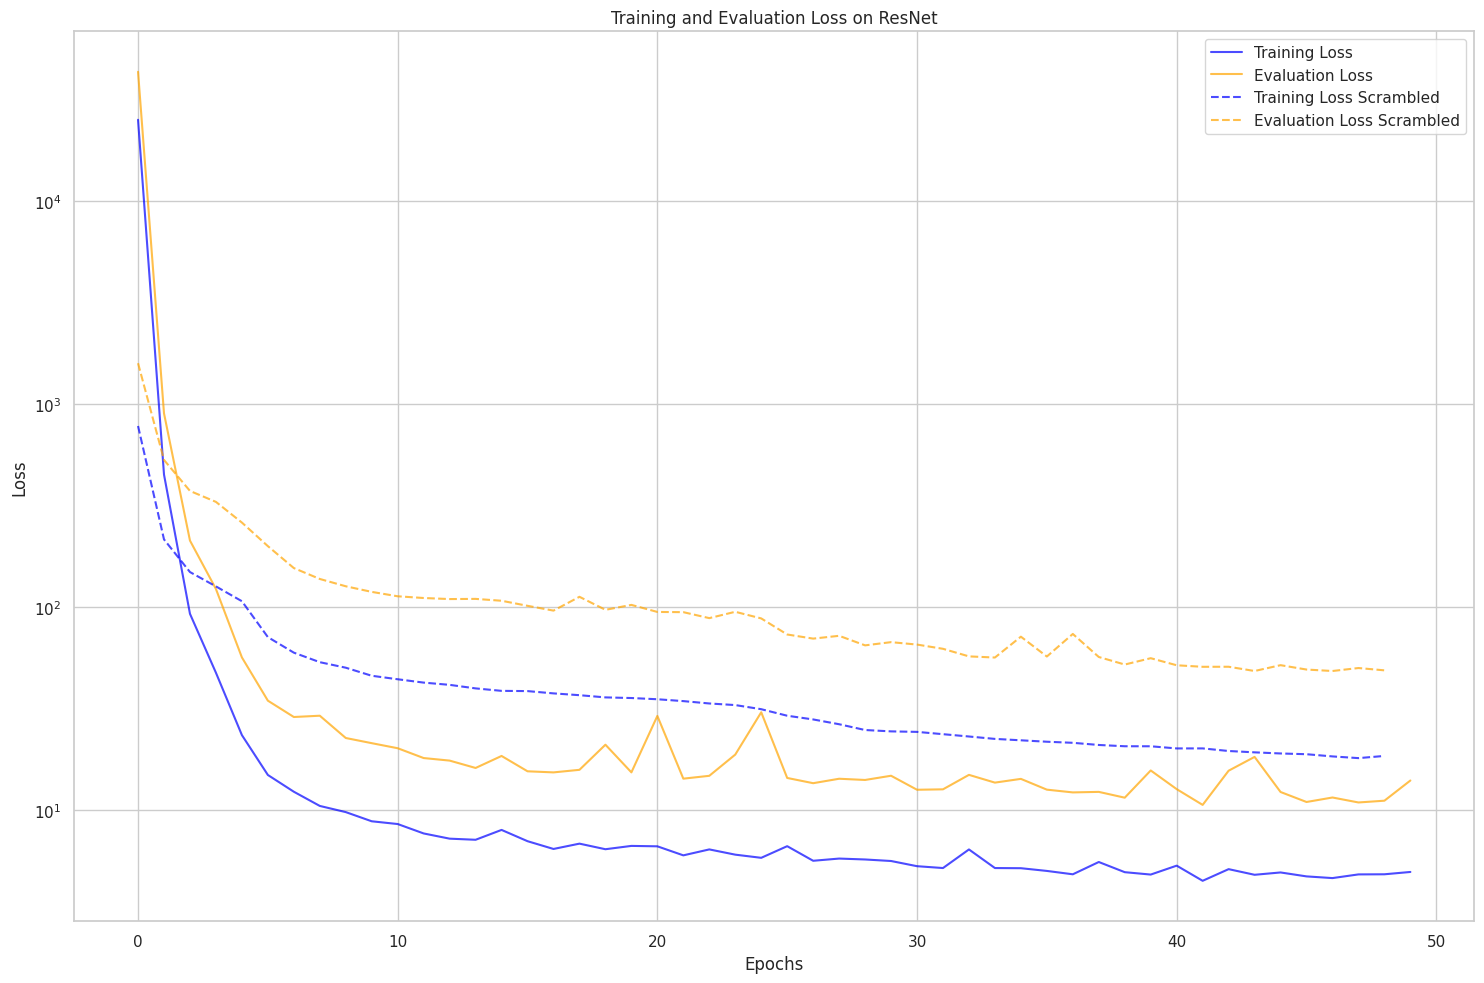

In [132]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()

ax.plot(tr_losses_base, label='Training Loss', color='blue', alpha=0.7)
ax.plot(eval_losses_base, label='Evaluation Loss', color='orange', alpha=0.7)

# ax = fig.add_subplot(212)

ax.plot(tr_losses_scrambled[1:], label='Training Loss Scrambled', color='blue', alpha=0.7, linestyle='--')
ax.plot(eval_losses_scrambled[1:], label='Evaluation Loss Scrambled', color='orange', alpha=0.7, linestyle='--')
ax.set_title('Training and Evaluation Loss on ResNet')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.savefig('../reports/challenge2/images/training_curves_resnet_exB.png')
plt.show()

### Step 5.
Final generalization error

In [120]:
final_generalization_loss = {}

resnet_base.eval()
resnet_scrambled.eval()

X, y = test_set[:]
X, y = X.to(DEVICE), y.to(DEVICE)
y_pred = resnet_base(X)
final_generalization_loss['resnet_base'] = nn.MSELoss()(y_pred.flatten(), y).item()

X, y = test_set_scrambled[:]
X, y = X.to(DEVICE), y.to(DEVICE)
y_pred = resnet_scrambled(X)
final_generalization_loss['resnet_scrambled'] = nn.MSELoss()(y_pred.flatten(), y).item()

In [121]:
print(tabulate(final_generalization_loss.items(), headers=['Model', 'Final Generalization Loss'], tablefmt='fancy_grid', numalign='right'))

╒══════════════════╤═════════════════════════════╕
│ Model            │   Final Generalization Loss │
╞══════════════════╪═════════════════════════════╡
│ resnet_base      │                     1.76127 │
├──────────────────┼─────────────────────────────┤
│ resnet_scrambled │                     16.9151 │
╘══════════════════╧═════════════════════════════╛


### Step 6.
Evaluate a neighbourhood of a test sample

In [122]:
# Generate a new test vector
test_vector = 2 * torch.rand(6)

In [123]:
def generate_grid(center):
    grid1 = torch.arange(center, center+0.1, 0.001)
    grid2 = torch.arange(center-0.1, center, 0.001)
    return torch.clip(torch.cat([grid2, grid1]), 0, 2)

In [124]:
results = {}
results_scrambled = {}

for i, center in enumerate(test_vector):
	grid = generate_grid(center)
	test_sample = torch.clone(test_vector).repeat(len(grid), 1)
	test_sample[:, i] = grid
	test_sample = test_sample.to(DEVICE)

	y_base = bell_6(test_sample.T).detach().cpu().numpy()
	y_scrambled = bell_6_scrambled(test_sample.T).detach().cpu().numpy()

	y_pred_base = resnet_base(test_sample).detach().cpu().numpy()
	y_pred_scrambled = resnet_scrambled(test_sample).detach().cpu().numpy()

	error_base = np.abs(y_base - y_pred_base.flatten())
	error_scrambled = np.abs(y_scrambled - y_pred_scrambled.flatten())

	results[i] = (center, grid, y_base, y_pred_base, error_base)
	results_scrambled[i] = (center, grid, y_scrambled, y_pred_scrambled, error_scrambled)

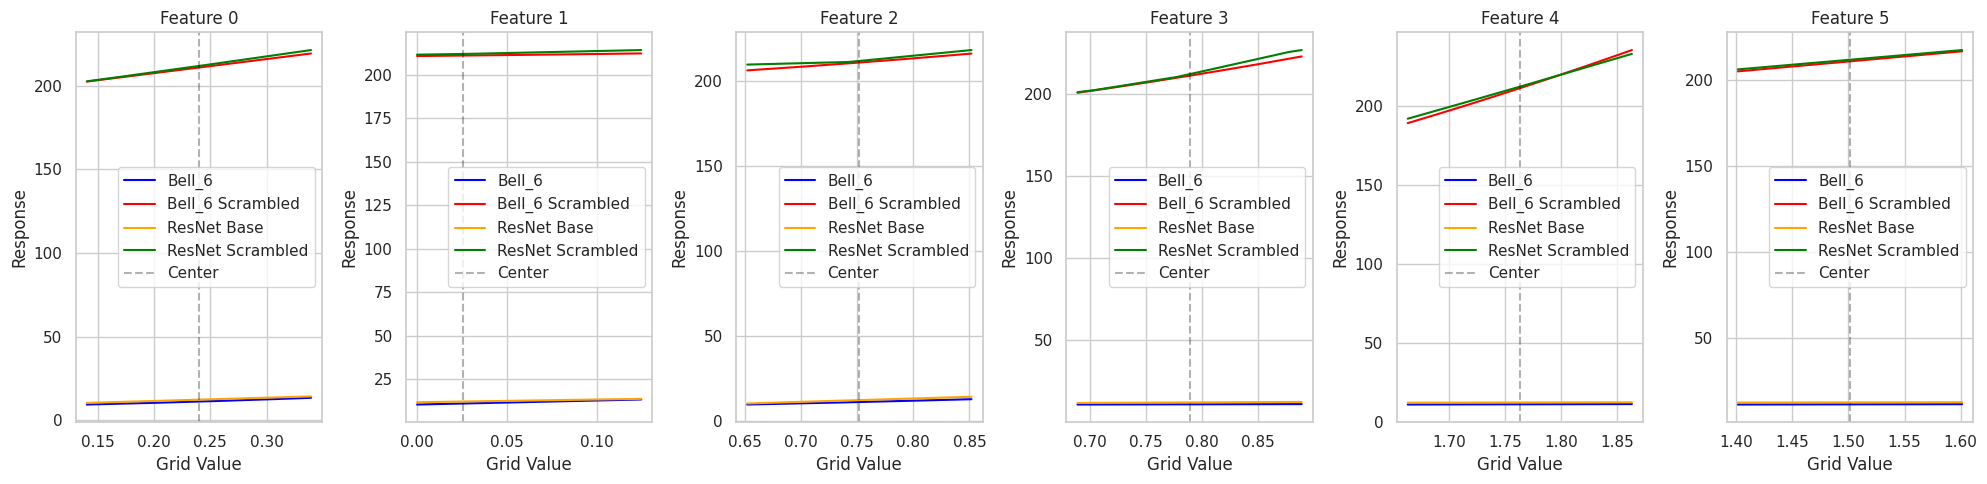

In [129]:
# Plot the results grouped by [i], having x-axis the grid, y-axis the bell_6 and the predictions
# using sns
sns.set_theme(style="whitegrid")

fig = plt.figure(figsize=(20, 5))

for i in range(6):
    ax = fig.add_subplot(1, 6, i + 1)
    center, grid, y_base, y_pred_base, error_base = results[i]
    _, _, y_scrambled, y_pred_scrambled, error_scrambled = results_scrambled[i]

    sns.lineplot(x=grid, y=y_base.flatten(), ax=ax, color='blue', label='Bell_6')
    sns.lineplot(x=grid, y=y_scrambled.flatten(), ax=ax, color='red', label='Bell_6 Scrambled')
    sns.lineplot(x=grid, y=y_pred_base.flatten(), ax=ax, color='orange', label='ResNet Base')
    sns.lineplot(x=grid, y=y_pred_scrambled.flatten(), ax=ax, color='green', label='ResNet Scrambled')
    ax.axvline(center, color='black', linestyle='--', label='Center', alpha=0.3)

    ax.set_title(f'Feature {i}')
    ax.set_xlabel('Grid Value')
    ax.set_ylabel('Response')
    ax.legend()

plt.tight_layout()
plt.savefig('../reports/challenge2/images/predictions_exB.png')
plt.show()

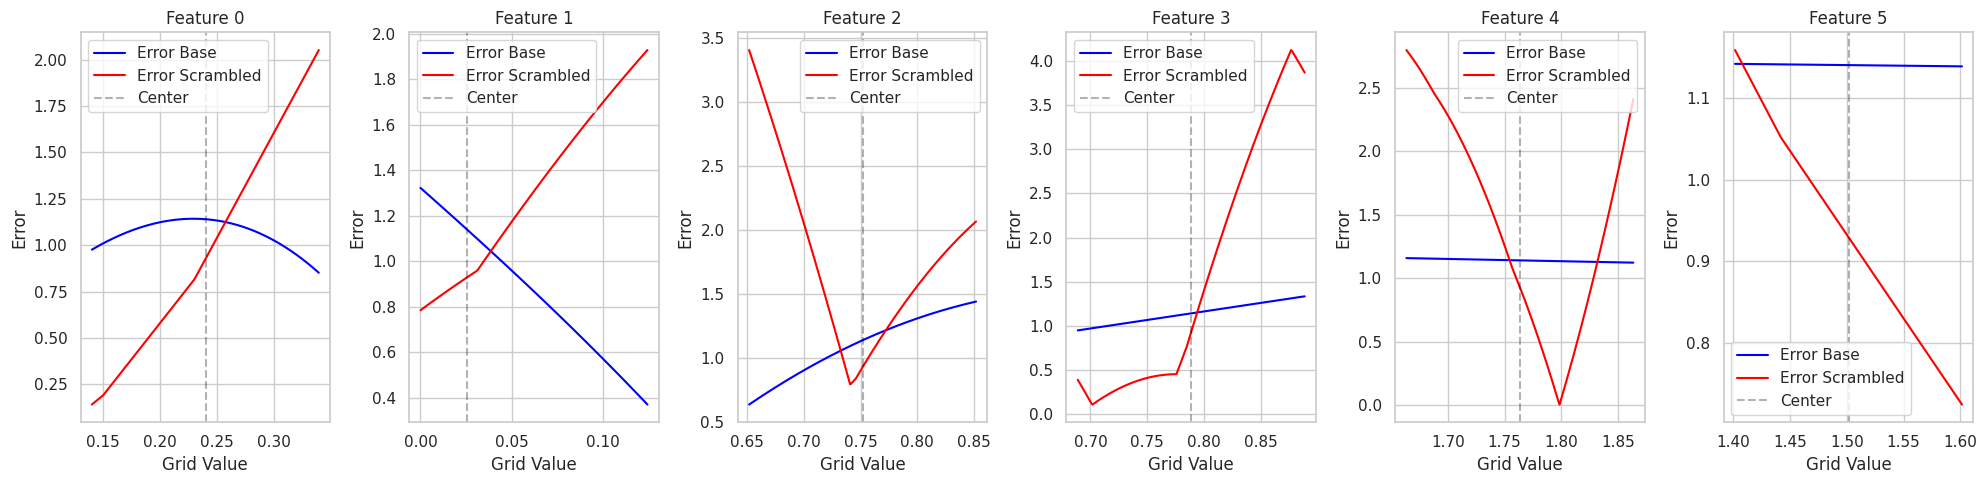

In [130]:
sns.set_theme(style="whitegrid")

fig = plt.figure(figsize=(20, 5))

for i in range(6):
	ax = fig.add_subplot(1,6, i + 1)
	center, grid, y_base, y_pred_base, error_base = results[i]
	_, _, y_scrambled, y_pred_scrambled, error_scrambled = results_scrambled[i]

	sns.lineplot(x=grid, y=error_base, ax=ax, color='blue', label='Error Base')
	sns.lineplot(x=grid, y=error_scrambled, ax=ax, color='red', label='Error Scrambled')
	ax.axvline(center, color='black', linestyle='--', label='Center', alpha=0.3)

	ax.set_title(f'Feature {i}')
	ax.set_xlabel('Grid Value')
	ax.set_ylabel('Error')
	ax.legend()

plt.tight_layout()
plt.savefig('../reports/challenge2/images/errors_exB.png')
plt.show()